<a href="https://colab.research.google.com/github/QiLOL/CIS700-VGG16-Dog-Cat/blob/main/analysis_test1_test2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Load model and analysis the the weight

load all models

In [ ]:
# save to google drive
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


adv_trained models

In [ ]:
!cp drive/MyDrive/model_adv_trained* ./

original model

In [ ]:
!cp drive/MyDrive/model_ori_trained* ./

In [ ]:
# total new model

!cp drive/MyDrive/model_adv_new_net.pkl ./

In [ ]:
# flipped with loss data

!cp drive/MyDrive/flipped* ./

In [ ]:
import glob
print(glob.glob("./*.pkl"))

[]


In [ ]:
%matplotlib inline
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os, glob, time, copy, random, zipfile
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.model_selection import train_test_split
from tqdm import tqdm_notebook as tqdm


import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils.data as data
import torch.nn.functional as F
import torchvision
from torchvision import models, transforms



In [ ]:
import glob
print(glob.glob("./*.pkl"))

['./model_adv_trained2_flipped_0.01.pkl', './model_adv_trained2_0.0001.pkl', './model_adv_trained2_0.01.pkl', './model_ori_trained.pkl', './model_adv_trained2_flipped_0.0001.pkl', './model_adv_new_net.pkl', './model_adv_trained2_0.007.pkl', './flipped1_1.pkl', './model_adv_trained_flipped_0.0001.pkl', './model_adv_trained2_flipped_0.007.pkl', './model_adv_trained1_0.007.pkl', './model_adv_trained_flipped_0.007.pkl', './flipped1_3.pkl', './model_adv_trained2_flipped_1e-05.pkl', './model_adv_trained1_1e-05.pkl', './flipped2_1.pkl', './flipped_adv.pkl', './model_ori_trained2.pkl', './model_adv_trained2_1e-05.pkl', './model_adv_trained1_0.0001.pkl', './flipped2_4.pkl', './flipped2_3.pkl', './flipped1_2.pkl', './model_adv_trained_flipped_1e-05.pkl', './flipped2_2.pkl']


In [ ]:
baseline1 = "model_ori_trained.pkl"
baseline2 = "model_ori_trained2.pkl"

compare_setting1 = ['model_adv_trained1_0.007.pkl', 'model_adv_trained1_0.0001.pkl', 'model_adv_trained1_1e-05.pkl']
compare_setting2 = ['model_adv_trained2_0.01.pkl','model_adv_trained2_0.007.pkl', 'model_adv_trained2_0.0001.pkl', 'model_adv_trained2_1e-05.pkl']

compare_flipped_setting1 = ['model_adv_trained_flipped_0.007.pkl', 'model_adv_trained_flipped_0.0001.pkl', 'model_adv_trained_flipped_1e-05.pkl']
compare_flipped_setting2 = ['model_adv_trained2_flipped_0.01.pkl','model_adv_trained2_flipped_0.007.pkl', 'model_adv_trained2_flipped_0.0001.pkl', 'model_adv_trained2_flipped_1e-05.pkl']


newmodel2 = "model_adv_new_net.pkl"



In [ ]:
baseline1_net = torch.load(baseline1)
baseline2_net = torch.load(baseline2)

In [ ]:
def getWeights(model):
  weights_adv_dict = {}
  for name, param in model.named_parameters():
      if param.requires_grad:
          print(name)
          weights_adv_dict[name] = param.data
  return weights_adv_dict

  

In [ ]:
baseline1_weights = getWeights(baseline1_net)

classifier.6.weight
classifier.6.bias


In [ ]:
baseline2_weights = getWeights(baseline2_net)

features.0.weight
features.0.bias
classifier.6.weight
classifier.6.bias


In [ ]:
compare1_dict = {}
for i in range(len(compare_setting1)):
  tmp_name = compare_setting1[i]
  tmp_model = torch.load(tmp_name)
  tmp_weights = getWeights(tmp_model)
  compare1_dict[tmp_name] = tmp_weights

classifier.6.weight
classifier.6.bias
classifier.6.weight
classifier.6.bias
classifier.6.weight
classifier.6.bias


In [ ]:
compare1_dict['model_adv_trained1_0.007.pkl']

{'classifier.6.bias': tensor([-0.0126, -0.0165], device='cuda:0'),
 'classifier.6.weight': tensor([[ 0.0111,  0.0216,  0.0042,  ...,  0.0011, -0.0094, -0.0071],
         [ 0.0016,  0.0008, -0.0194,  ...,  0.0139,  0.0189,  0.0045]],
        device='cuda:0')}

In [ ]:
compare1_dict['model_adv_trained1_0.0001.pkl']

{'classifier.6.bias': tensor([-0.0233, -0.0059], device='cuda:0'),
 'classifier.6.weight': tensor([[ 0.0100,  0.0151,  0.0063,  ..., -0.0019, -0.0069, -0.0044],
         [ 0.0027,  0.0073, -0.0215,  ...,  0.0169,  0.0165,  0.0018]],
        device='cuda:0')}

In [ ]:
compare2_dict = {}
for i in range(len(compare_setting2)):
  tmp_name = compare_setting2[i]
  tmp_model = torch.load(tmp_name)
  tmp_weights = getWeights(tmp_model)
  compare2_dict[tmp_name] = tmp_weights

features.0.weight
features.0.bias
classifier.6.weight
classifier.6.bias
features.0.weight
features.0.bias
classifier.6.weight
classifier.6.bias
features.0.weight
features.0.bias
classifier.6.weight
classifier.6.bias
features.0.weight
features.0.bias
classifier.6.weight
classifier.6.bias


In [ ]:
compare1_flipped_dict = {}
for i in range(len(compare_flipped_setting1)):
  tmp_name = compare_flipped_setting1[i]
  tmp_model = torch.load(tmp_name)
  tmp_weights = getWeights(tmp_model)
  compare1_flipped_dict[tmp_name] = tmp_weights

classifier.6.weight
classifier.6.bias
classifier.6.weight
classifier.6.bias
classifier.6.weight
classifier.6.bias


In [ ]:
compare2_flipped_dict = {}
for i in range(len(compare_flipped_setting2)):
  tmp_name = compare_flipped_setting2[i]
  tmp_model = torch.load(tmp_name)
  tmp_weights = getWeights(tmp_model)
  compare2_flipped_dict[tmp_name] = tmp_weights

features.0.weight
features.0.bias
classifier.6.weight
classifier.6.bias
features.0.weight
features.0.bias
classifier.6.weight
classifier.6.bias
features.0.weight
features.0.bias
classifier.6.weight
classifier.6.bias
features.0.weight
features.0.bias
classifier.6.weight
classifier.6.bias


In [ ]:
new_net2 = torch.load(newmodel2)
new_net2_weight = getWeights(new_net2)

features.0.weight
features.0.bias
classifier.6.weight
classifier.6.bias


In [ ]:
# compare
# non-flipped

def compare_model(basemodel_weight, children_weight_dict):
  result_dict = {}
  for key in children_weight_dict:
    result_dict[key] = {}
    for cate in  basemodel_weight:
      result_dict[key][cate] = children_weight_dict[key][cate] - basemodel_weight[cate]
  return result_dict

In [ ]:
compare1_result_dict = compare_model(baseline1_weights, compare1_dict)

In [ ]:
compare2_result_dict = compare_model(baseline2_weights, compare2_dict)

In [ ]:
# flipped

compare1_flipped_result_dict = compare_model(baseline1_weights, compare1_flipped_dict)
compare2_flipped_result_dict = compare_model(baseline2_weights, compare2_flipped_dict)


In [ ]:
new2_result_dict = {}
for key in new_net2_weight:
  new2_result_dict[key] = new_net2_weight[key] - baseline2_weights[key]

In [ ]:
new2_result_dict.keys()

dict_keys(['features.0.weight', 'features.0.bias', 'classifier.6.weight', 'classifier.6.bias'])

In [ ]:
max_v = new2_result_dict['features.0.weight'].max() 
min_v = new2_result_dict['features.0.weight'].min()

normalized_v = (new2_result_dict['features.0.weight'] - min_v) / (max_v - min_v)

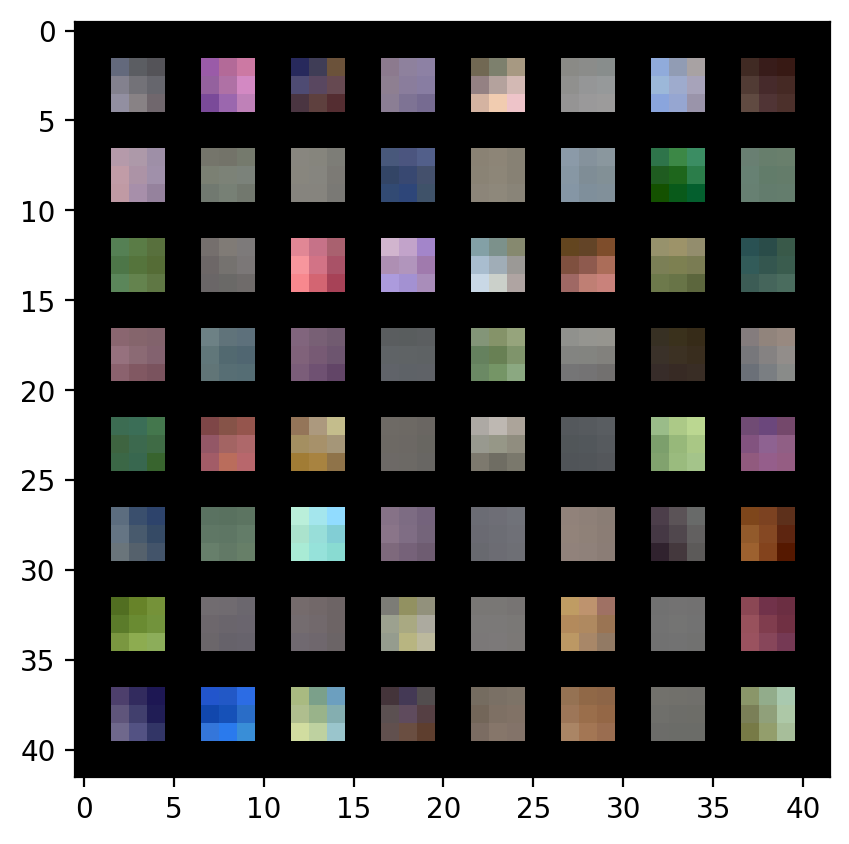

In [ ]:
def show(img):
   plt.rcParams["figure.figsize"] = (8,5)
   plt.figure(dpi=200)
   npimg = img.numpy()
   plt.imshow(np.transpose(npimg, (1,2,0)), interpolation='nearest')

video = normalized_v.cpu()
grid = vutils.make_grid(video)
show(grid) # here to use save_img func 

tensor([[[0.0079, 0.0070, 0.0051],
         [0.0093, 0.0068, 0.0054],
         [0.0092, 0.0062, 0.0040]],

        [[0.0046, 0.0045, 0.0033],
         [0.0048, 0.0037, 0.0034],
         [0.0046, 0.0033, 0.0016]],

        [[0.0066, 0.0064, 0.0062],
         [0.0061, 0.0061, 0.0065],
         [0.0058, 0.0065, 0.0050]]], device='cuda:0')

In [ ]:
baseline2_weights['features.0.weight'][8] 

tensor([[[-3.1752e-01, -3.6403e-01, -8.2313e-02],
         [-1.3639e-01,  3.9206e-01,  3.4175e-01],
         [ 8.3603e-02,  4.1264e-01,  3.7076e-01]],

        [[ 6.7870e-03, -3.2416e-01, -4.3098e-02],
         [-2.9159e-01, -3.2892e-02, -1.3115e-01],
         [-2.9612e-01, -1.6813e-01, -2.6802e-01]],

        [[ 4.1039e-01,  1.5659e-01,  5.2691e-02],
         [ 1.7694e-01,  3.1806e-01, -3.8213e-02],
         [-7.6927e-04,  1.5463e-04, -2.6678e-01]]], device='cuda:0')

In [ ]:
# the last layer

new2_result_dict['classifier.6.weight'].max()

tensor(0.0628, device='cuda:0')

In [ ]:
new2_result_dict['classifier.6.weight'].min()

tensor(-0.0635, device='cuda:0')

In [ ]:
max_v = new2_result_dict['classifier.6.weight'].max() 
min_v = new2_result_dict['classifier.6.weight'].min()

normalized_v = (new2_result_dict['classifier.6.weight'] - min_v) / (max_v - min_v)

In [ ]:
normalized_v.mean()

tensor(0.4612, device='cuda:0')

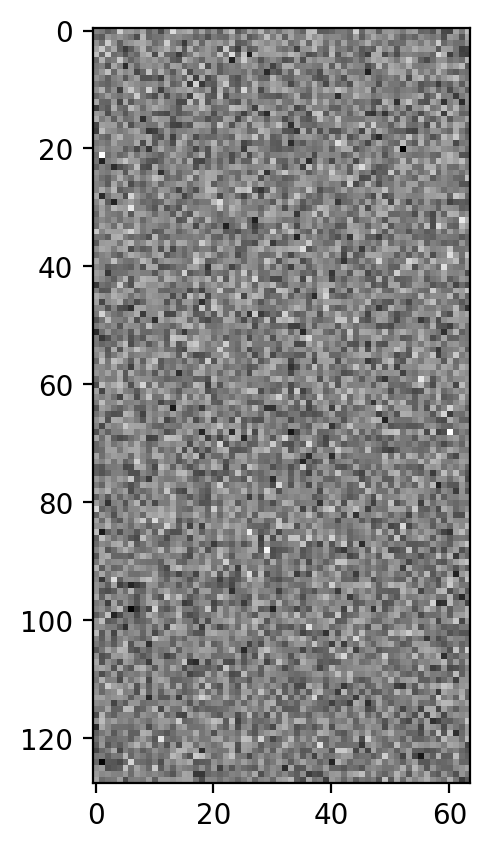

In [ ]:
import matplotlib.pyplot as plt 
import numpy as np 

plt.rcParams["figure.figsize"] = (8,5)
plt.figure(dpi=200)
 
X = np.resize(normalized_v.cpu().numpy(), (128, 64))
plt.imshow(X, cmap="gray") 
plt.show() 

array([[0.50738186, 0.4819674 , 0.3756057 , ..., 0.5455887 , 0.6282453 ,
        0.4840669 ],
       [0.33352295, 0.61852866, 0.5702368 , ..., 0.4607268 , 0.23645768,
        0.35954922]], dtype=float32)

In [ ]:
compare1_result_dict
compare1_flipped_result_dict

model_adv_trained2_flipped_0.01.pkl
tensor(0.0001, device='cuda:0')
tensor(0.4913, device='cuda:0')
model_adv_trained2_flipped_0.007.pkl
tensor(-2.0768e-05, device='cuda:0')
tensor(0.5032, device='cuda:0')
model_adv_trained2_flipped_0.0001.pkl
tensor(3.0425e-05, device='cuda:0')
tensor(0.5154, device='cuda:0')
model_adv_trained2_flipped_1e-05.pkl
tensor(0.0004, device='cuda:0')
tensor(0.5058, device='cuda:0')


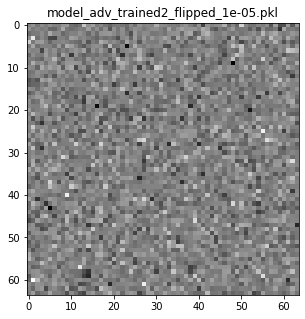

In [ ]:
# the last layer
test_result_dict = compare2_flipped_result_dict
normalized_dict={}
for key in test_result_dict:
  # do mean
  print(key)
  print(test_result_dict[key]['classifier.6.weight'][0].mean())

  # normalize
  max_v = test_result_dict[key]['classifier.6.weight'][0].max() 
  min_v = test_result_dict[key]['classifier.6.weight'][0].min()
  normalized_v = (test_result_dict[key]['classifier.6.weight'][0] - min_v) / (max_v - min_v)

  print(normalized_v.mean())

  X = np.resize(normalized_v.cpu().numpy(), (64, 64))
  normalized_dict[key] = normalized_v.cpu().numpy()
  plt.title(key)
  plt.imshow(X, cmap="gray") 
  plt.savefig(key+".pdf")


In [ ]:
import difflib
sm=difflib.SequenceMatcher(None,normalized_dict['model_adv_trained_flipped_0.007.pkl'],normalized_dict['model_adv_trained_flipped_1e-05.pkl'])
sm.ratio()

0.00048828125

In [ ]:
normalized_dict.keys()

dict_keys(['model_adv_trained_flipped_0.007.pkl', 'model_adv_trained_flipped_0.0001.pkl', 'model_adv_trained_flipped_1e-05.pkl'])

In [ ]:
!cp *_lastlayer.pdf drive/MyDrive/


model_adv_trained2_0.01.pkl
tensor(-0.0003, device='cuda:0')
tensor(0.5393, device='cuda:0')
model_adv_trained2_0.007.pkl
tensor(-0.0004, device='cuda:0')
tensor(0.5151, device='cuda:0')
model_adv_trained2_0.0001.pkl
tensor(-0.0007, device='cuda:0')
tensor(0.5231, device='cuda:0')
model_adv_trained2_1e-05.pkl
tensor(-0.0003, device='cuda:0')
tensor(0.3777, device='cuda:0')


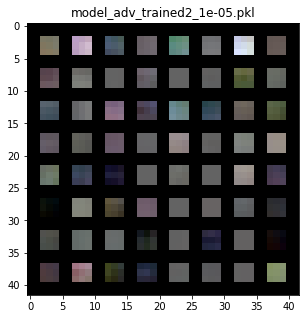

In [ ]:
# the first layer


test_result_dict = compare2_result_dict
normalized_dict={}
for key in test_result_dict:
  # do mean
  print(key)
  print(test_result_dict[key]['features.0.weight'].mean())

  # normalize
  max_v = test_result_dict[key]['features.0.weight'].max() 
  min_v = test_result_dict[key]['features.0.weight'].min()
  normalized_v = (test_result_dict[key]['features.0.weight'] - min_v) / (max_v - min_v)

  print(normalized_v.mean())

  video = normalized_v.cpu()
  grid = vutils.make_grid(video)
  plt.title(key)
  npimg = grid.numpy()
  plt.imshow(np.transpose(npimg, (1,2,0)), interpolation='nearest')

  plt.savefig(key+"_lastlayer.pdf")
